In [185]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

c = 1
N = 101
dx = 0.01
dt = 0.005

def u0(x):
    return sp.exp(-100 * (x - 0.5)**2)
#liczy POLOZENIE x,t+dt
def u(x1, x2):
    return 2 * x2[0] - x1[0] + x2[1] * dt**2
#liczy PRZYSPIESZENIE x,t
def a(x1, x2, x3):
    return (x3[0] + x1[0] - 2 * x2[0]) / (dx**2)

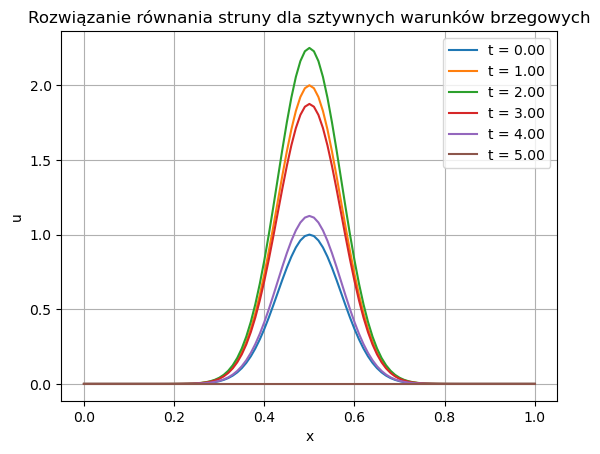

In [186]:
range_x = np.arange(0, 1.01, dx)
range_t = np.linspace(0, 5, 6)
time = len(range_t)
X = np.zeros([time, N, 2])

for i in range(1, N - 1):
    X[0][i][0] = u0(range_x[i])

for t in range(1, time-1):
    X[t][0][0] = 0
    X[t][N - 1][0] = 0

    for i in range(1, N - 1):
        X[t][i][0] = u(X[t - 2][i], X[t - 1][i])
        X[t][i][1] = a(X[t - 1][i], X[t][i], X[t + 1][i])

plt.figure()

for t in range(time):
    plt.plot(range_x, X[t].T[0], label=f"t = {range_t[t]:.2f}")

plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title('Rozwiązanie równania struny dla sztywnych warunków brzegowych')
plt.grid(True)  # Dodanie siatki
plt.show()

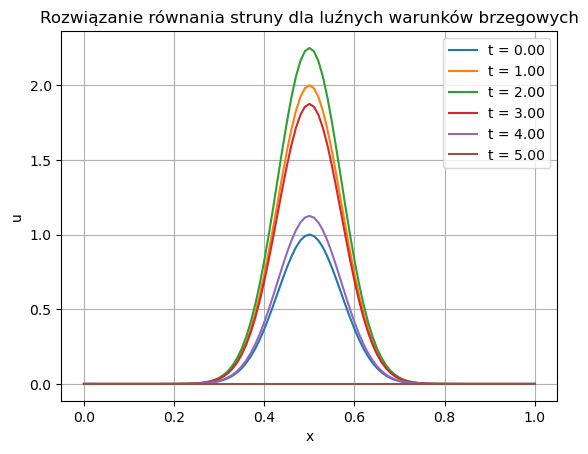

In [187]:
X = np.zeros([time, N, 2])

for i in range(1, N - 1):
    X[0][i][0] = u0(range_x[i])
    
X[0][0][0] = X[t][1][0]
X[0][N-1][0] = X[t][N-2][0]

for t in range(1, time-1):
    for i in range(1, N - 1):
        X[t][i][0] = u(X[t - 2][i], X[t - 1][i])
        X[t][i][1] = a(X[t - 1][i], X[t][i], X[t + 1][i])
    X[t][0][0] = X[t][1][0]
    X[t][N-1][0] = X[t][N-2][0]
    
plt.figure()

for t in range(time):
    plt.plot(range_x, X[t].T[0], label=f"t = {range_t[t]:.2f}")

plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title('Rozwiązanie równania struny dla luźnych warunków brzegowych')
plt.grid(True)
plt.show()

In [188]:
def v(x1,x2):
    return (x2[0] - x1[0]) / dt

def ab(x1, x2, x3, b):
    return (x3[0] + x1[0] - 2 * x2[0]) / (dx**2) - 2 * b * v(x1,x2)

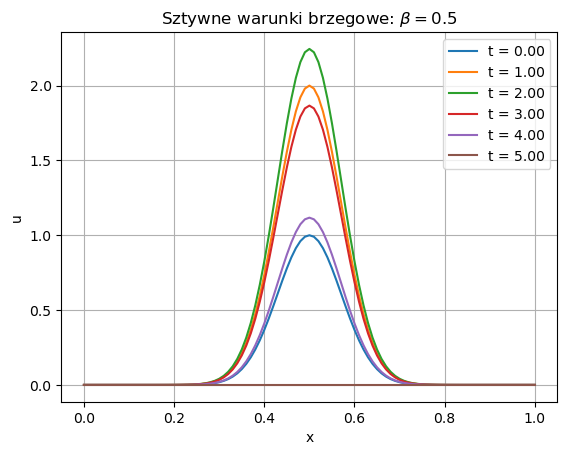

In [189]:
X = np.zeros([time, N, 2])

for i in range(1, N - 1):
    X[0][i][0] = u0(range_x[i])
    
for t in range(1, time-1):
    X[t][0][0] = 0
    X[t][N - 1][0] = 0

    for i in range(1, N - 1):
        X[t][i][0] = u(X[t - 2][i], X[t - 1][i])
        X[t][i][1] = ab(X[t - 1][i], X[t][i], X[t + 1][i], 0.5)

plt.figure()

for t in range(time):
    plt.plot(range_x, X[t].T[0], label=f"t = {range_t[t]:.2f}")

plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title(r'Sztywne warunki brzegowe: $\beta = 0.5$')
plt.grid(True)
plt.show()

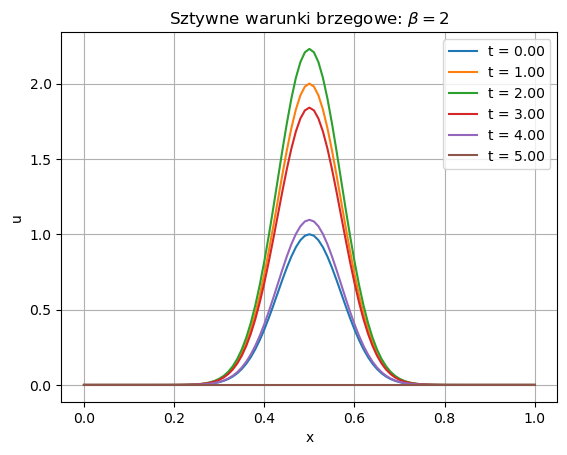

In [190]:
X = np.zeros([time, N, 2])

for i in range(1, N - 1):
    X[0][i][0] = u0(range_x[i])
    
for t in range(1, time-1):
    X[t][0][0] = 0
    X[t][N - 1][0] = 0

    for i in range(1, N - 1):
        X[t][i][0] = u(X[t - 2][i], X[t - 1][i])
        X[t][i][1] = ab(X[t - 1][i], X[t][i], X[t + 1][i], 2)

plt.figure()

for t in range(time):
    plt.plot(range_x, X[t].T[0], label=f"t = {range_t[t]:.2f}")

plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title(r'Sztywne warunki brzegowe: $\beta = 2$')
plt.grid(True)
plt.show()

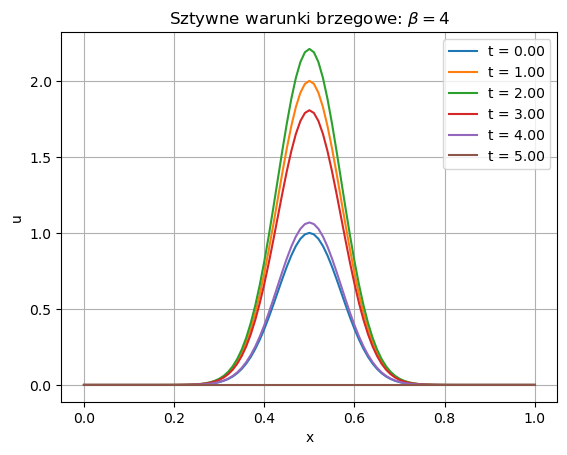

In [191]:
X = np.zeros([time, N, 2])

for i in range(1, N - 1):
    X[0][i][0] = u0(range_x[i])
    
for t in range(1, time-1):
    X[t][0][0] = 0
    X[t][N - 1][0] = 0

    for i in range(1, N - 1):
        X[t][i][0] = u(X[t - 2][i], X[t - 1][i])
        X[t][i][1] = ab(X[t - 1][i], X[t][i], X[t + 1][i], 4)

plt.figure()

for t in range(time):
    plt.plot(range_x, X[t].T[0], label=f"t = {range_t[t]:.2f}")

plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title(r'Sztywne warunki brzegowe: $\beta = 4$')
plt.grid(True)
plt.show()

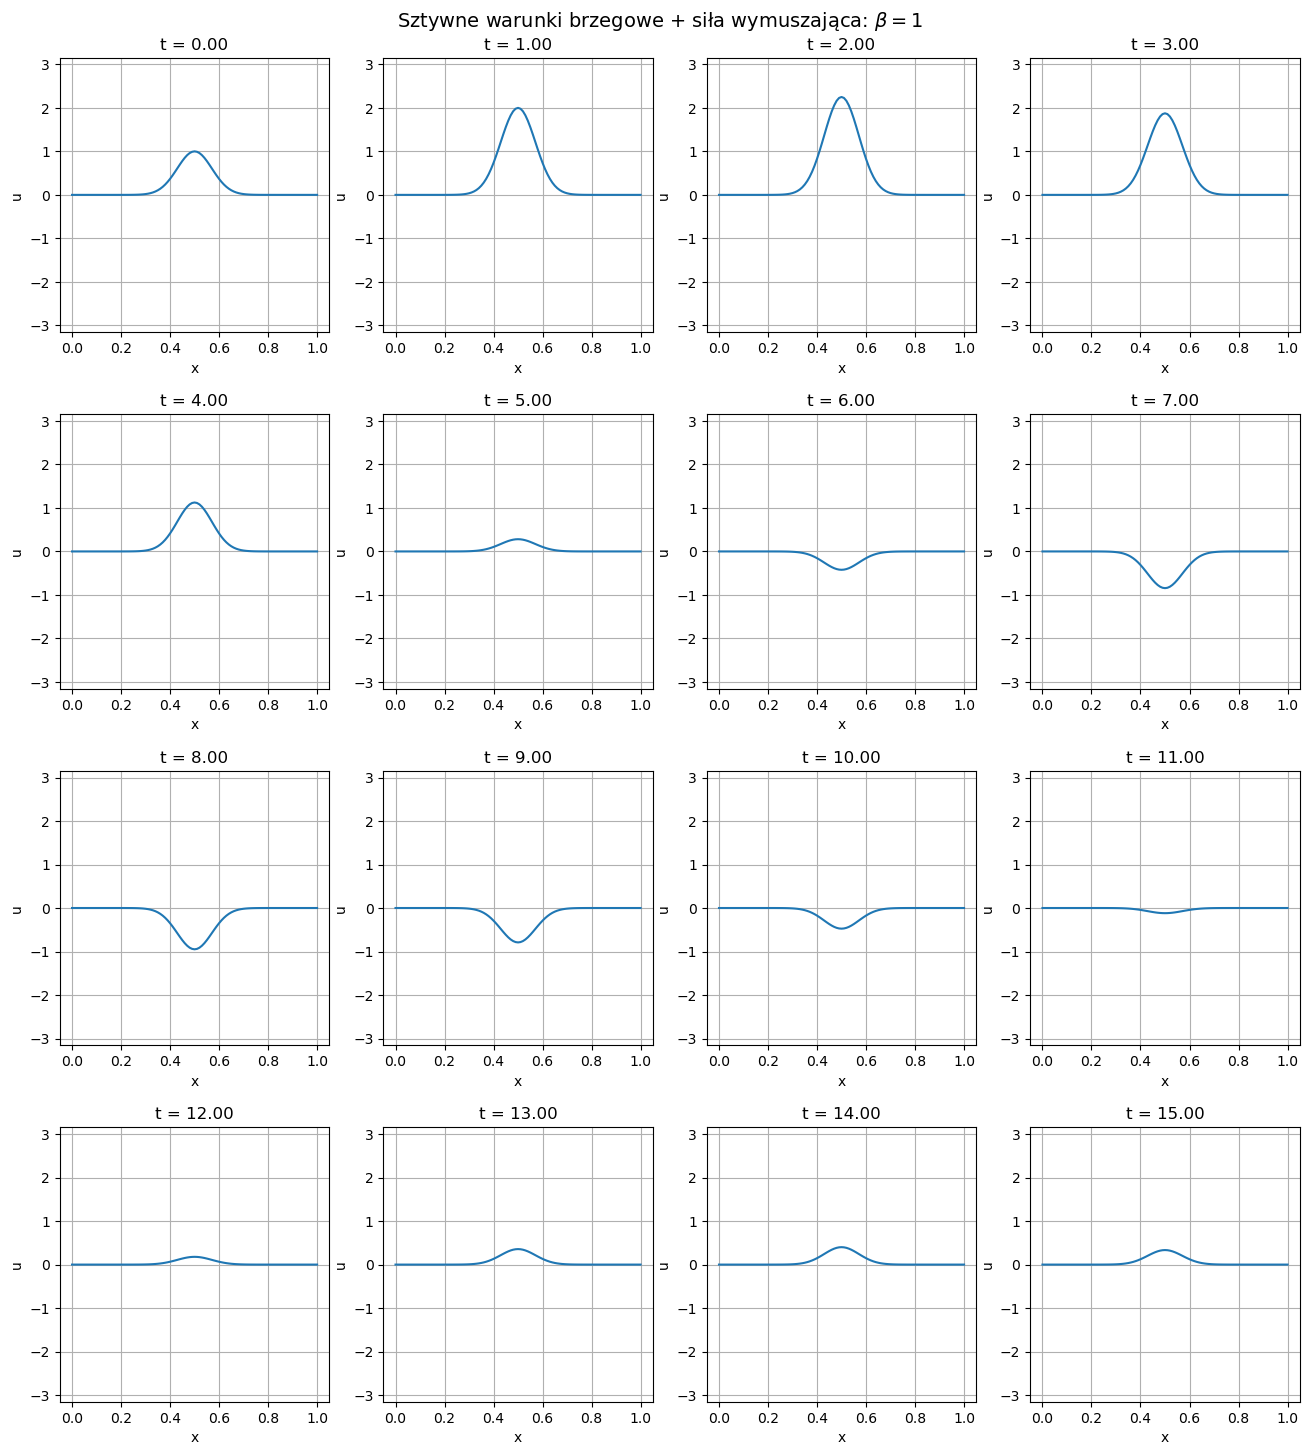

In [195]:
def ab(x1, x2, x3, beta, t):
    omega = np.pi/2
    if t == 51:
        return (x3[0] + x1[0] - 2 * x2[0]) / (dx ** 2) - 2 * beta * x2[1] + np.cos(omega * t)
    else:
        return (x3[0] + x1[0] - 2 * x2[0]) / (dx ** 2) - 2 * beta * x2[1]


range_x = np.arange(0, 1.01, dx)
range_t = np.linspace(0, 15, 16)
time = len(range_t)
beta = 1
X = np.zeros([time+1, N, 2])

for i in range(1, N - 1):
    X[0][i][0] = u0(range_x[i])

for t in range(1, time):
    X[t][0][0] = 0
    X[t][N - 1][0] = 0

    for i in range(1, N - 1):
        X[t][i][0] = u(X[t - 2][i], X[t - 1][i])
        X[t][i][1] = ab(X[t - 1][i], X[t][i], X[t + 1][i], beta, t)

fig, axes = plt.subplots(4, 4, figsize=(16, 16))
fig.subplots_adjust(top=0.95, hspace=0.3)

center_index = N // 2  # Indeks środkowego punktu struny

amplitudes = np.mean(np.abs(X[:, center_index, 0]), axis=0)  # Obliczenie średnich wartości wychylenia w środkowym punkcie dla każdej chwili czasowej
max_amplitude = np.max(amplitudes)  # Maksymalna wartość amplitudy

y_lim = 4 * max_amplitude  # Rozmiar osi y

for t, ax in zip(range(time), axes.flatten()):
    ax.plot(range_x, X[t].T[0])
    ax.set_title(f"t = {range_t[t]:.2f}")
    ax.set_xlabel('x')
    ax.set_ylabel('u')
    ax.set_ylim([-y_lim, y_lim])
    ax.grid(True)

plt.suptitle(r'Sztywne warunki brzegowe + siła wymuszająca: $\beta = 1$', fontsize=14)
plt.show()

In [196]:
def ut(x1,x2):
    return (x2[0] - x1[0]) / dt

def ux(x1,x3):
    return (x3[0] - x1[0]) / (2*dx)

def ab(x1, x2, x3, beta, t, omega):
    if t == 51:
        return (x3[0] + x1[0] - 2 * x2[0]) / (dx ** 2) - 2 * beta * x2[1] + np.cos(omega * t)
    else:
        return (x3[0] + x1[0] - 2 * x2[0]) / (dx ** 2) - 2 * beta * x2[1]

In [202]:
def Energy(B,omega):
    range_x = np.arange(0, 1.01, dx)
    range_t = np.linspace(0, 15, 16)
    time = len(range_t)
    beta = 1
    X = np.zeros([time+1, N, 2])

    for i in range(1, N - 1):
        X[0][i][0] = u0(range_x[i])
        
    for t in range(1, time):
        X[t][0][0] = 0
        X[t][N - 1][0] = 0

        for i in range(1, N - 1):
            X[t][i][0] = ut(X[t - 2][i], X[t - 1][i])
            X[t][i][1] = ab(X[t - 1][i], X[t][i], X[t + 1][i], beta, t, omega)
    return X

In [230]:
range_t = np.linspace(0, 15, 16)
dt = range_t[1] - range_t[0]
b = 1
t1 = 16
t2 = 20
omega_values = np.linspace(0, 5, 5)
E_sr = np.zeros(len(omega_values))

for w in range(len(omega_values)):
    E_sr[w] = Energy(b, omega_values[w])

# Wykresy
plt.plot(range(len(E_sr)), E_sr)
plt.xlabel("Indeks")
plt.ylabel("Energia średnia")
plt.title("Energia średnia w funkcji indeksu")
plt.show()

IndexError: index 100 is out of bounds for axis 0 with size 100